In [1]:
from google.colab import files
from google.colab import drive
import os

# optional: mount Google Drive
drive.mount('/content/gdrive')

# cd parth to Kaggle data
%cd /content/gdrive/My Drive/Kaggle/melanoma

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1qJ47SkRrR6gtmKvnBstwgxcG-abjnb3a/Kaggle/melanoma


In [2]:
import tensorflow as tf
from tensorflow.train import Feature, Features, Example

from skimage import io
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import sys

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


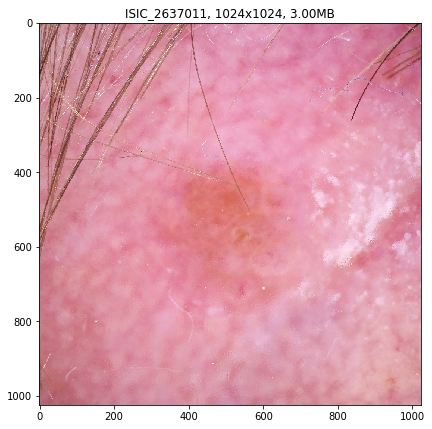

In [3]:
class TFRECParser:
    __IMG_PLOT_DIMENSION = (6, 6)
    __TFREC_DESCRIPTOR = {"image_name": tf.io.FixedLenFeature([], tf.string),
                          "image": tf.io.FixedLenFeature([], tf.string)}  
  
    def __init__(self) -> None:
        self.__dataset = None # tf.data.TFRecordDataset

    def load(self, path_tfrec: str = 'tfrecords/train*.tfrec') -> None:
        def parser(serialized_example: Example) -> Example:
            example = tf.io.parse_single_example(serialized_example, 
                                                 features=TFRECParser.__TFREC_DESCRIPTOR)
            return example
        self.__dataset = tf.data.TFRecordDataset(tf.io.gfile.glob(path_tfrec))
        self.__dataset = self.__dataset.map(parser)

    def get_image_arr(self, image_name: str) -> np.ndarray:
        record_dataset = self.__dataset.filter(lambda example: tf.equal(example["image_name"], image_name))
        example = next(iter(record_dataset))
        arr = tf.image.decode_jpeg(example['image'], channels=3).numpy()
        return arr

    def get_image(self, image_name: str) -> Image:
        return Image.fromarray(self.get_image_arr(image_name))

    def plot_image(self, image_name: str) -> Image:
        img_arr = self.get_image_arr(image_name)
        img = Image.fromarray(img_arr)
        
        # prep title
        title = "{}, {}x{}, {:.2f}MB".format(image_name,
                                             img.size[0], 
                                             img.size[1], 
                                             sys.getsizeof(img_arr)/1024/1024) 

        # render plot
        plt.figure(figsize=TFRECParser.__IMG_PLOT_DIMENSION)
        io.imshow(img_arr)
        plt.title(title) 
        plt.show()

parser = TFRECParser()
parser.load('tfrecords/train*.tfrec')
parser.plot_image('ISIC_2637011')


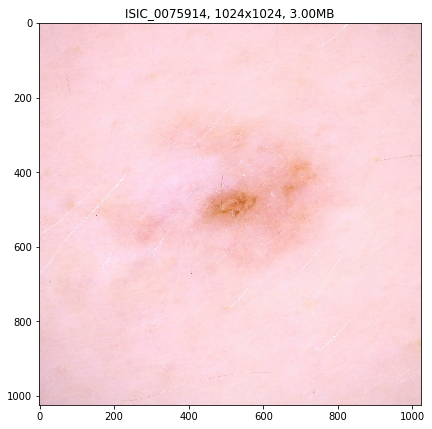

In [ ]:
parser.plot_image('ISIC_0075914')

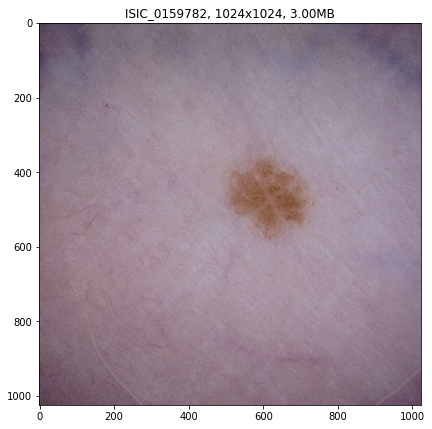

In [ ]:
parser.plot_image('ISIC_0159782')

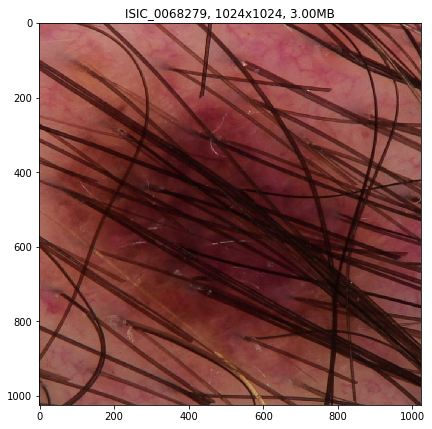

In [ ]:
parser.plot_image('ISIC_0068279')